# Ejemplo 1

Simular la dinámica de

<a id='ecu1'></a>
$$x_{t+1}=ax_t +b \tag{1} $$

Para los siguientes datos:

- $x_0=1/2, a = 1/2, b =1/2$, $\overline{x}=1$, $n = 10$
- $x_0=2, a = 0.3, b =5$, $\overline{x}=50/7$, $n = 10$
- $x_0=7, a = 0.3, b =5$, $\overline{x}=50/7$, $n = 10$
- $x_0=0.1, a = 0.95, b =3$, $\overline{x}=20$, $n = 10$
- $x_0=2, a = 1, b =0$, $\overline{x}\in\mathbb{R}$, $n = 10$
- $x_0=3, a = 1, b =1$, $n = 10$


## Solución



In [ ]:
from clases import *

def f(x,a,b):
  return a*x +b

- $x_0=1/2, a = 1/2, b =1/2$, $\overline{x}=1$, $n = 10$


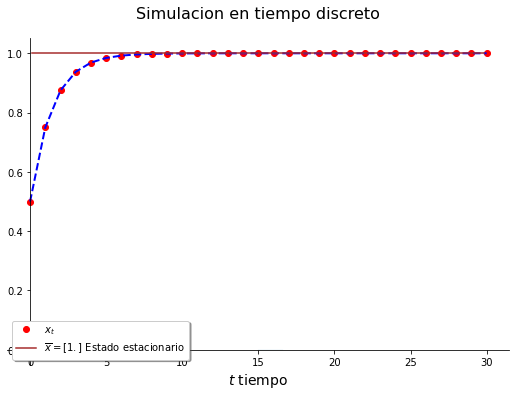

In [ ]:
#dindis(x_0,f,n)
dina = dindis(0.5, lambda x : f(x,a=0.5,b=0.5), 30)
dina.plot_orbita(ee=True)

- $x_0=2, a = 0.3, b =5$, $\overline{x}=50/7$, $n = 10$


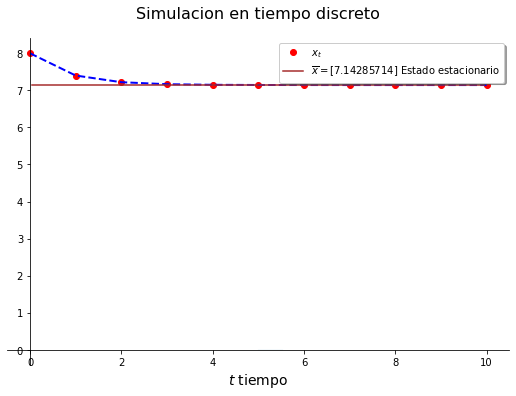

In [ ]:
dina = dindis(8, lambda x : f(x,a=0.3,b=5), 10)
dina.plot_orbita(ee=True)

- $x_0=7, a = 0.3, b =5$, $\overline{x}=50/7$, $n = 10$


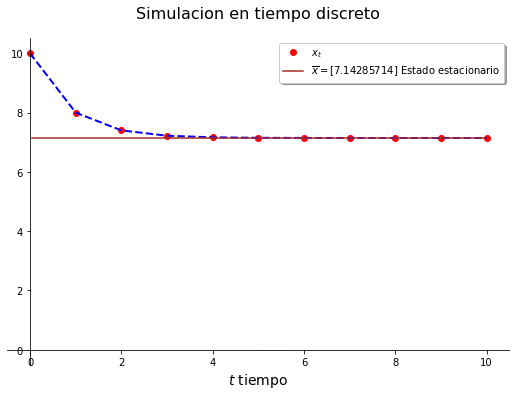

In [ ]:
dina = dindis(10, lambda x : f(x,a=0.3,b=5), 10)
dina.plot_orbita(ee=True)

- $x_0=0.1, a = 0.95, b =3$, $\overline{x}=20$, $n = 10$

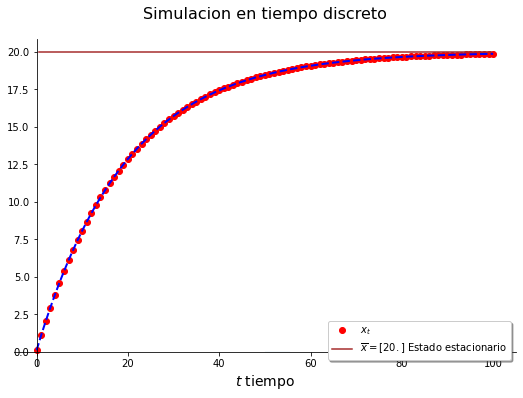

In [ ]:
dina = dindis(0.1, lambda x : f(x,a=0.95,b=1), 100)
dina.plot_orbita(ee=True)

- $x_0=2, a = 1, b =0$, $\overline{x}\in\mathbb{R}$, $n = 10$


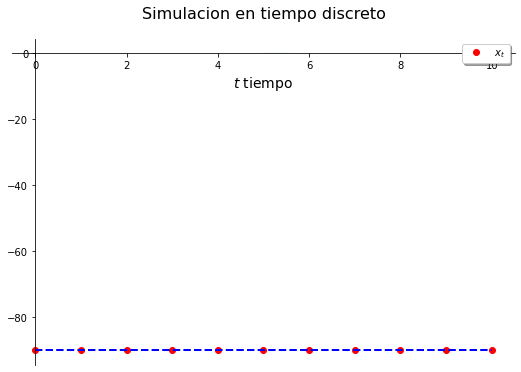

In [ ]:
dina = dindis(-90, lambda x : f(x,a=1,b=0), 10)
dina.plot_orbita()

- $x_0=3, a = 1, b =1$, $n = 10$


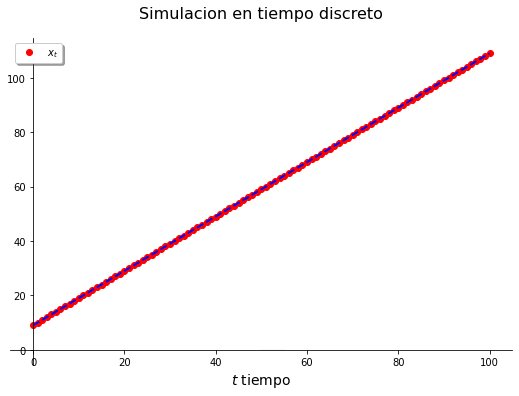

In [ ]:
dina = dindis(9, lambda x : f(x,a=1,b=1), 100)
dina.plot_orbita()

# Ejemplo 2

Simular la dinámica de

<a id='ecu2'></a>
$$x_{t+1}=cos(x_t) \tag{2} $$

- $x_0=1.4$, $n = 10$
- $x_0=0.1$, $n = 10$

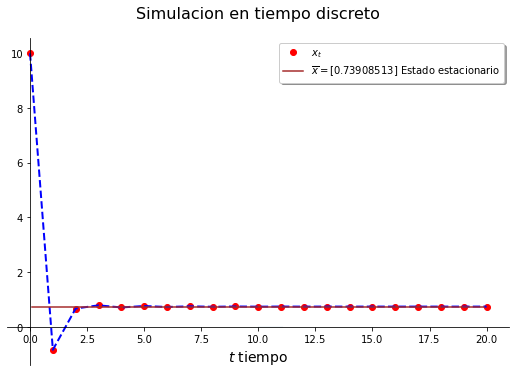

el estado eatcionario es: [0.73908513]


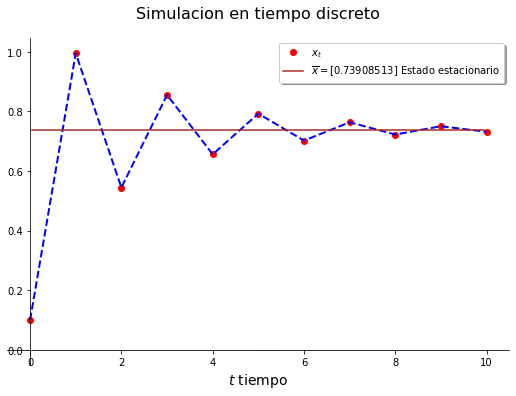

el estado eatcionario es: [0.73908513]


In [ ]:
from clases import * 

def f(x):
  return np.cos(x)
  
#dindis(x_0,f,n)
dinamica = dindis(10, f, 20)
dinamica.plot_orbita(ee=True)
ee = dinamica.ee()
print('el estado eatcionario es: ' + str(ee))

dinamica = dindis(0.1, f, 10)
dinamica.plot_orbita(ee=True)
ee = dinamica.ee()
print('el estado eatcionario es: '+ str(ee))

# Ejemplo 3: Modelo de Solow

<a id='ecuacion-de-solow'></a>
$$
k_{t+1} = \frac{\sigma A_0 f(k_t) + (1 - \delta) k_t}{1 + n} \tag{3}
$$

Aquí

- $ \sigma $ tasa de ahorro exógena  
- $ A_0 $ Nive de tecnología constante 
- $ n $ tasa de crecimiento de la población
- $ \delta $ tasa de depreciación del capital

In [ ]:
from clases import *
from funciones import *

def produc(k,α):
  return np.power(k,α)

def F(k,
      n = 0.05,           # tasa de creciemiento de la poblacion
      σ = 0.25,           # tasa de ahorro
      δ = 0.1,            # tasa de depreciacion
      A0 = 2.0,           # nivel de téécnologíía
      f = lambda k: np.power(k,0.5), #funcion de producción
      ):
  return (σ*A0*f(k)+(1-δ)*k)/(1+n)

n = 0.05     # tasa de creciemiento de la poblacion
σ = 0.25     # tasa de ahorro
δ = 0.1      # tasa de depreciacion
A0 = 2.0     # nivel de téécnologíía
α = 0.3      # nivel de capital dedicado a la produccion


kee = np.power((σ*A0)/(n + δ),1/(1-α))

print('El estado estacionario es: ' + str(kee))

El estado estacionario es: 5.5843115041821845


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


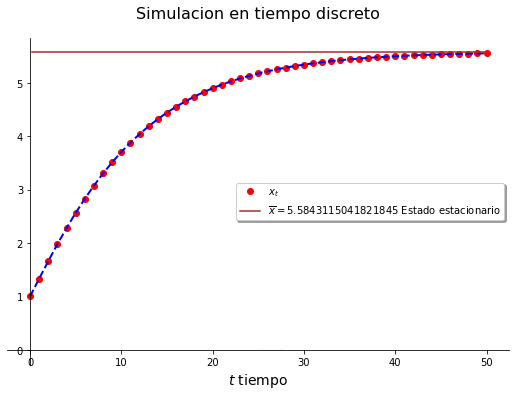

In [ ]:
### Dinamica pais pobre
#dindis(k_0,F,n)
dinamicap = dindis(1, lambda k: F(k, f=lambda y: produc(y,α=0.3)), 50)

dinamicap.plot_orbita(ee=True, eed = kee)

pkt = dinamicap.orbita()

gammap = pkt[1:]/pkt[0:-1]

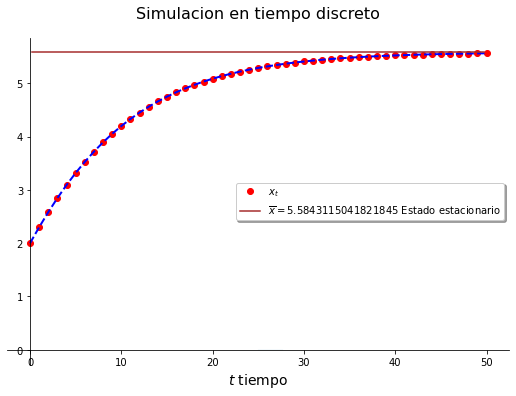

In [ ]:
### Dinamica pais rico

dinamicar = dindis(2, lambda k: F(k, f=lambda y: produc(y,α=0.3)), 50)

dinamicar.plot_orbita(ee = True, eed = kee)

rkt = dinamicar.orbita()

gammar = rkt[1:]/rkt[0:-1]

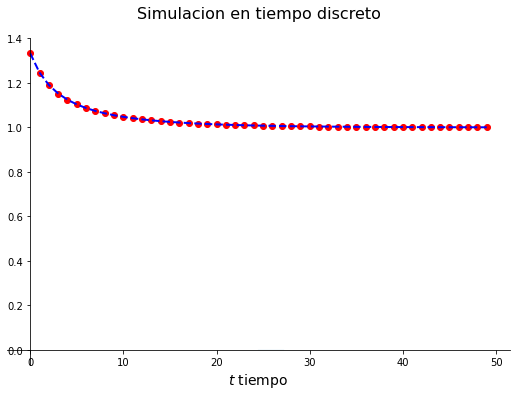

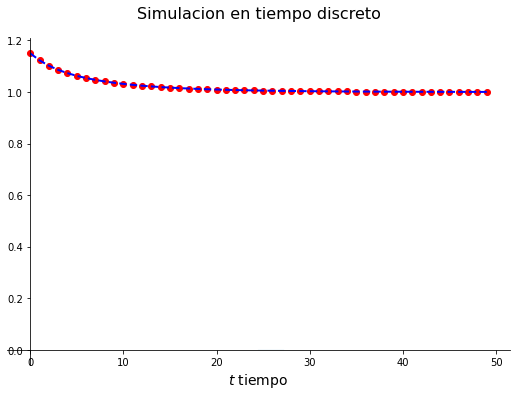

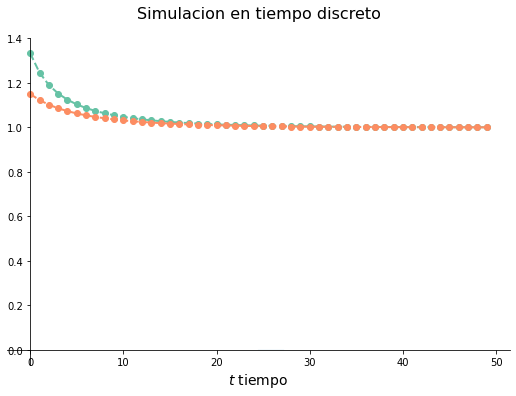

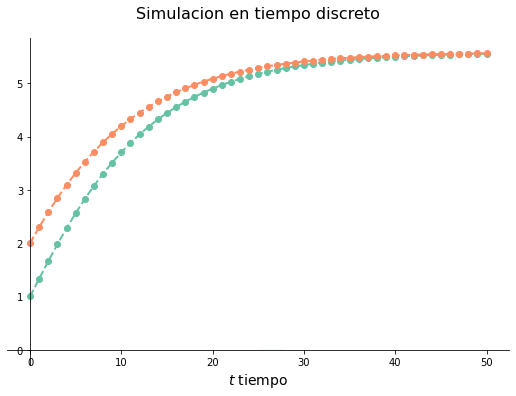

In [ ]:
#### tasas de crecimiento

miplotdis(gammap)
miplotdis(gammar)
miplotdisv([gammap, gammar])
miplotdisv([pkt, rkt])

In [ ]:
datos = imprimir([gammap, gammar])
datos 

,datos 1,datos 2
0,1.33333,1.15027
1,1.24648,1.12291
2,1.19083,1.10219
3,1.15243,1.08606
4,1.12452,1.07321
5,1.10343,1.06278
6,1.08703,1.0542
7,1.07399,1.04705
8,1.06342,1.04104
9,1.05473,1.03593
